In [ ]:
# calculo taxa de retorno simples

In [ ]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#ações da
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1') 

In [ ]:
PG['Close'].plot();

In [ ]:
PG.head()

In [ ]:
PG.tail()

In [ ]:
# (close(1)/close(0))-1
# pct.change() metodo faz calculo
PG['Retorno-simples'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG

In [ ]:
PG['Retorno-simples'].plot();

In [ ]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [ ]:
PG['Close'].plot(figsize=(10, 5));

In [ ]:
PG['Retorno-simples'].plot(figsize=(10, 5));

In [ ]:
# média dos retornos diarios PG
avg_returns_d = PG['Retorno-simples'].mean()
avg_returns_d

In [ ]:
# média dos retornos anuais PG
avg_returns_a = PG['Retorno-simples'].mean() * 250 # média de dias de negociação
avg_returns_a

In [ ]:
print( str (round(avg_returns_a, 5) * 100) + ' %')

In [ ]:
# retornos logaritmos 
PG['Retornos-log'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['Retornos-log']

In [ ]:
log_return_d = PG['Retornos-log'].mean()
log_return_d

In [ ]:
log_return_a = PG['Retornos-log'].mean() * 250
log_return_a

In [ ]:
print( str (round(log_return_a, 5) * 100) + ' %')

In [ ]:
# usar retorno simples quando estamos avaliando varias ações ao mesmo tempo
# usar retorno logaritmo quando estamos avaliando uma unica ação

In [ ]:
# Calculando retorno de um portifólio

In [ ]:
# lista com ticker das ações 
tickers = ['PG', 'MSFT', 'F', 'GE']
dados = pd.DataFrame()

for t in tickers:
    dados[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [ ]:
dados.info()

In [ ]:
dados.head()

In [ ]:
dados.tail()

In [ ]:
dados.iloc[0]

In [ ]:
# plotagem sem normalizar
dados.plot(figsize=(15, 6));

In [ ]:
# normalização dos dados base 100
(dados / dados.iloc[0] * 100).plot(figsize=(15, 6));

In [ ]:
dados.loc['1995-01-03'] # rótulo

In [ ]:
dados.iloc[0] # indice

In [ ]:
# calculando retorno do portifólio
retornos = (dados / dados.shift(1)) - 1

In [ ]:
retornos.head()

In [ ]:
# lista com pesos 
pesos = np.array([0.25, 0.25, 0.25, 0.25])

In [ ]:
# np.dot calcula o produto de um vetor o matriz - produto escalar
np.dot(retornos, pesos)


In [ ]:
anual_retornos = retornos.mean() * 250
anual_retornos

In [ ]:
np.dot(anual_retornos, pesos)

In [ ]:
portifolio = str(round(np.dot(anual_retornos, pesos), 5) * 100) + '%'

In [ ]:
portifolio

In [ ]:
# comparando com pesos de outra carteira
pesos_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [ ]:
portifolio_2 = str(round(np.dot(anual_retornos, pesos_2), 5) * 100) + '%'

In [ ]:
portifolio_2

In [ ]:
print(portifolio)
print(portifolio_2)

In [ ]:
# indice de açoes 
indices = ['^GSPC', # S&P500
           '^IXIC', # NASDAQ
           '^GDAXI', # DAX alemanha
           '^BVSP', # BOVESP Brasil
           ]

In [ ]:
dados_ind = pd.DataFrame()

for i in  indices:
    dados_ind[i] = wb.DataReader(i, data_source='yahoo', start='1997-1-1')['Adj Close']

In [ ]:
dados_ind.head()

In [ ]:
dados_ind.tail()

In [ ]:
# plotagem sem normalizar 
dados_ind.plot(figsize=(15, 6));

In [ ]:
# normalização dos dados base 100
(dados_ind / dados_ind.iloc[0] * 100).plot(figsize=(15, 6));

In [ ]:
indices_retornos = (dados_ind / dados_ind.shift(1)) - 1
indices_retornos.tail()

In [ ]:
anual_indices_retornos = indices_retornos.mean() * 250
anual_indices_retornos

In [ ]:
# comparação com o melhor indice/ação/indice com pesos iguais DJI
tickers_comp = ['PG', '^GSPC', '^DJI']

comp_precos = pd.DataFrame()

for t in tickers_comp:
    comp_precos[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [ ]:
comp_precos.tail()

In [ ]:
# normalização para ver performace durante um periodo
(comp_precos / comp_precos.iloc[0] * 100).plot(figsize=(15, 6))
plt.show() 

In [ ]:
# medindo risco de um ativo

In [ ]:
tickers_risco = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()

for t in tickers_risco:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [ ]:
sec_data.tail()

In [ ]:
sec_retornos = np.log(sec_data / sec_data.shift(1))

In [ ]:
sec_retornos

In [ ]:
# média diária
sec_retornos['PG'].mean()

In [ ]:
# média anual
sec_retornos['PG'].mean() *250

In [ ]:
# desvio padrão
sec_retornos['PG'].std()

In [ ]:
# anualizando desvio padrão
sec_retornos['PG'].std() *250 **0.5 # desvio padrão é a raiz quadrada da variancia

In [ ]:
sec_retornos['BEI.DE'].mean()

In [ ]:
sec_retornos['BEI.DE'].mean() *250

In [ ]:
sec_retornos['BEI.DE'].std()

In [ ]:
sec_retornos['BEI.DE'].std() *250 **0.5

In [ ]:
print(sec_retornos['PG'].mean() *250)
print(sec_retornos['BEI.DE'].mean() *250)

In [ ]:
sec_retornos[['PG', 'BEI.DE']].mean() *250

In [ ]:
sec_retornos[['PG', 'BEI.DE']].std() *250 *0.5

In [ ]:
# calculando Covariancia e correlação
PG_var = sec_retornos['PG'].var()

In [ ]:
BEI_var = sec_retornos['BEI.DE'].var()

In [ ]:
PG_var = sec_retornos['PG'].var() *250

In [ ]:
BEI_var = sec_retornos['BEI.DE'].var() *250

In [ ]:
# calculo de covariancia em uma tabela de valores
cov_matrix = sec_retornos.cov()
cov_matrix

In [ ]:
cov_matrix_a = sec_retornos.cov() *250
cov_matrix_a

In [ ]:
# calculo ccorrelação
corr_matrix = sec_retornos.corr()
corr_matrix

In [ ]:
# não devemos anualizar a tabela de correção

In [ ]:
# calculo risco portifolio
pesos_3 = np.array([0.5, 0.5])

In [ ]:
portifolio_var = np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))
portifolio_var

In [ ]:
# volatilidade portifolio
portifolio_vol = (np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))) **0.5
portifolio_vol

In [ ]:
print(str(round(portifolio_vol, 5) *100) + ' %')

In [ ]:
# calculando risco de portifólio diversificado e não diversificado
# risco diversificado == variancia do portifolio - variancia anual ponderada
PG_var_a = sec_retornos[['PG']].var() *250
PG_var_a

In [ ]:
BEI_var_a = sec_retornos[['BEI.DE']].var() *250
BEI_var_a

In [ ]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

In [ ]:
float(PG_var_a)

In [ ]:
PG_var_a = sec_retornos['PG'].var() *250
PG_var_a

In [ ]:
BEI_var_a = sec_retornos['BEI.DE'].var() *250
BEI_var_a

In [ ]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

In [ ]:
print(str(round(risco_div *100, 3)) + ' %')

In [ ]:
n_dr_1 = portifolio_var - risco_div
n_dr_1 = round(n_dr_1, 10)
n_dr_1

In [ ]:
n_dr_2 = (pesos_3[0] **2 *PG_var_a) + (pesos_3[1] **2 *BEI_var_a)
n_dr_2 = round(n_dr_2, 10)
n_dr_2

In [ ]:
n_dr_1 == n_dr_2

In [ ]:
# Regressão para analise financeira
# uso do arquivo Housing.xlsx

In [ ]:
# libs para regressão
import scipy as stats
import statsmodels.api as sm

In [ ]:
data = pd.read_excel('../arquivos/Housing.xlsx')

In [ ]:
data.head()

In [ ]:
data[['House Price', 'House Size (sq.ft.)']].head()

In [ ]:
x = data['House Size (sq.ft.)']
y = data['House Price']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
plt.scatter(x, y)
plt.show();

In [ ]:
# importante definir valores comparativos(0 ponto inicial, um pouco depois do ponto final)
# plt.axis definem valores do grafico
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.show();

In [ ]:
# gráficos devem ter legendas para melhor entendimento
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price')
plt.show();

In [ ]:
# calculando alpha, beta, r^2

In [ ]:
X1 = sm.add_constant(x)

reg = sm.OLS(y, X1).fit()

In [ ]:
reg.summary()

In [ ]:
# usando a lib do scipy
slope, intercept, r_value, p_value, std_err = stats.stats.linregress(x, y)

In [ ]:
print(slope)
print(intercept)
print(r_value)
print(r_value **2)
print(p_value)
print(std_err)

In [ ]:
# otimização portifolio de markowitz 
# fronteira eficiente

In [124]:
assets = ['PG', '^GSPC']
portifolio_3 =  pd.DataFrame()
for a in assets:
    portifolio_3[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [125]:
portifolio_3.tail()

,PG,^GSPC
Date,,
2022-01-24,161.300003,4410.129883
2022-01-25,159.539993,4356.450195
2022-01-26,158.149994,4349.930176
2022-01-27,159.130005,4326.509766
2022-01-28,160.500000,4431.850098


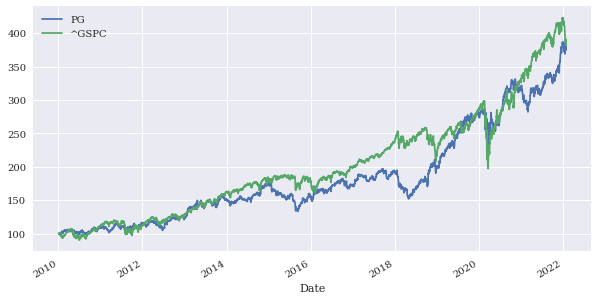

In [126]:
(portifolio_3 / portifolio_3.iloc[0] *100).plot(figsize=(10, 5));

In [127]:
log_ret_port = np.log(portifolio_3 / portifolio_3.shift(1))

In [128]:
log_ret_port.mean() *250

PG       0.109816
^GSPC    0.112204
dtype: float64

In [129]:
log_ret_port.cov() *250

,PG,^GSPC
PG,0.028505,0.016770
^GSPC,0.016770,0.029481


In [130]:
log_ret_port.corr()

,PG,^GSPC
PG,1.000000,0.578508
^GSPC,0.578508,1.000000


In [131]:
num_assets = len(assets)
num_assets

2

In [132]:
arr = np.random.random(2)
arr

array([0.22549157, 0.14481742])

In [133]:
arr[0] + arr[1]

0.3703089870795184

In [134]:
pesos_4 = np.random.random(num_assets)
pesos_4 /= np.sum(pesos_4)
pesos_4

array([0.09680682, 0.90319318])

In [135]:
pesos_4[0] + pesos_4[1]

1.0

In [136]:
# expectativa de rotorno do portifólio

In [137]:
np.sum(pesos_4 *log_ret_port.mean()) *250

0.11197316937933345

In [138]:
# expectativa de variancia do portifólio
np.dot(pesos_4.T, np.dot(log_ret_port.cov() *250, pesos_4))

0.02724926654538319

In [140]:
# expectativa de volatilidade
np.sqrt(np.dot(pesos_4.T, np.dot(log_ret_port.cov() *250, pesos_4)))

0.16507351860726538

In [ ]:
port_ret = []
port_vol = []
for x in range(1000):
    w = np.random.random(num_assets)
    w /= np.sum(w)
    port_ret.append(np.sum(w * log_ret_port.mean()) *250)
    port_vol.append(np.sqrt(np.dot(w.T, np.dot(log_ret_port.cov() *250, w))))

port_ret, port_vol

In [152]:
port_ret = []
port_vol = []
for x in range(500): # inicialmente usar 1000
    w = np.random.random(num_assets)
    w /= np.sum(w)
    port_ret.append(np.sum(w * log_ret_port.mean()) *250)
    port_vol.append(np.sqrt(np.dot(w.T, np.dot(log_ret_port.cov() *250, w))))

port_ret = np.array(port_ret)
port_vol = np.array(port_vol)

port_ret, port_vol

(array([0.11187387, 0.11109687, 0.11102899, 0.11100443, 0.11095795,
        0.11182245, 0.11192904, 0.11078941, 0.11078074, 0.11017909,
        0.11040964, 0.11044866, 0.11152589, 0.11140603, 0.11103494,
        0.11041816, 0.1108714 , 0.11009755, 0.11064686, 0.11045767,
        0.11145374, 0.11159571, 0.11016106, 0.11197525, 0.11051158,
        0.11066979, 0.11108829, 0.11183945, 0.11161041, 0.11116835,
        0.11155257, 0.11016478, 0.11092972, 0.11066179, 0.11139118,
        0.11059866, 0.11101881, 0.11036113, 0.11111502, 0.11100101,
        0.11053622, 0.11003453, 0.11015662, 0.11114042, 0.11219077,
        0.11081437, 0.11039661, 0.11055236, 0.11051749, 0.11026721,
        0.11037387, 0.11110006, 0.1099175 , 0.11055645, 0.11208393,
        0.11053772, 0.11162023, 0.11108044, 0.110729  , 0.11005819,
        0.11111998, 0.11098111, 0.11006367, 0.11219638, 0.11108485,
        0.11131993, 0.11090415, 0.11219783, 0.11093228, 0.110723  ,
        0.11057572, 0.11121387, 0.11124757, 0.11

In [153]:
portifolios = pd.DataFrame({'Retornos': port_ret, 'Volatilidade': port_vol})

In [154]:
portifolios.head()

,Retornos,Volatilidade
0,0.111874,0.162578
1,0.111097,0.151491
2,0.111029,0.151298
3,0.111004,0.151260
4,0.110958,0.151235


In [155]:
portifolios.tail()

,Retornos,Volatilidade
495,0.112053,0.167238
496,0.111197,0.152012
497,0.111606,0.156986
498,0.111263,0.152506
499,0.111633,0.157480


Text(0, 0.5, 'Retornos Expectativa')

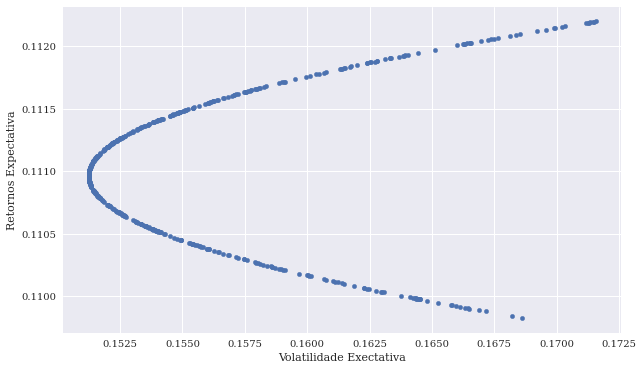

In [156]:
portifolios.plot(x='Volatilidade', y='Retornos', kind='scatter', figsize=(10, 6))
plt.xlabel('Volatilidade Exectativa')
plt.ylabel('Retornos Expectativa')